
# **<center>Model for Predicting Credit Card Fraud** </center>
----------

**<br>2023F-T3 BDM 3035 - Big Data Capstone Project 01**
<br>Group 1:
<br>&emsp;&emsp;Jefford Secondes
<br>&emsp;&emsp;Jovi Fez Bartolata
<br>&emsp;&emsp;Luz Zapanta
<br>&emsp;&emsp;Maricris Resma
<br>&emsp;&emsp;Keyvan Amini

--------------------


**PROJECT DESCRIPTION:**

The major goal of the project is to develop a predictive modelling application that effectively predicts credit card fraudulent actions, such as identity theft, financial fraud, and unauthorized access. Various supervised machine learning classifier algorithms will be developed and tested upon to be able to identify the model that gives the best accuracy that satisfies the requirement of greater than 80% accuracy. Historical data will be evaluated using various machine learning models, identifying abnormalities and trends suggestive of fraudulent activities. The fraud detection application, aimed to protect the integrity of Bank of Mississauga's operations, shall be used to mitigate fraudulent transactions. This comprehensive approach addresses both known fraud trends and emergent threats, providing a proactive defense mechanism against developing fraud strategies.

**OBJECTIVES:**

● Retrieve and manage credit card transaction Data from Google Cloud Platform

● Create a machine learning classifier model capable of detecting credit card fraud using Logistic Regression Model, Decision Tree, or Random Forest.

● Improve the adaptability of the model to evolving fraud patterns through continuous learning.

● Reduce false positives to guarantee a seamless and trustworthy user experience.

● Deliver the pickle file that can be integrated into Bank of Mississauga’s organizational systems and databases to assure seamless operation


----------
## <center> Data Preprocessing
----------

In [43]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTENC
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load the CSV data into a DataFrame
df_raw = pd.read_csv("./credit_card_transactions-ibm_v2.csv")

In [45]:
df_raw.head(2)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No


### Data Profiling

In [46]:
# Display dataframe information to get more details about the raw data.
df_raw.info()

# Overview of the summary statistics: mean, min, max, std
df_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


**Observations:**
- The raw data has 24,386,900  observations/rows and 15 variables/columns.
- Y Variable / Dependent Variable is <b>Is Fraud?</b>
- X Variable / Independent Variables will be taken from the other 14 variables 


**Observation**
- Raw data class imbalance has 24,357,143 No and 29,757 Yes
- Majority of the transactions was not fraud. Only 0.122% of the transactions were fraud, therefore, we have an highly imbalanced class.


In [47]:
# Function to get a tabe summarizing input dataframe's dtype, no of unique values and missing values for each feature
def getDataSummary(input_df):
    count_unique_values = []
    for column in input_df:
        # Count unique values for each column
        cnt_unique_values = len(input_df[column].unique())
        count_unique_values.append(cnt_unique_values)

    # Count missing values for each column    
    count_nan = input_df.isna().sum()

    # Summarize column attributes using a dataframe
    data_summary = pd.DataFrame()
    data_summary['data_type'] = input_df.dtypes

    # Add details
    data_summary['count_unique_values'] = count_unique_values
    data_summary['count_null'] = count_nan
    return data_summary

### Data Cleansing

Sample data to work only with 800k records

In [48]:
df_sample = df_raw.sample(n=800000, random_state=1)
df_sample.head(5)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
4866429,413,1,2011,3,15,07:50,$50.43,Swipe Transaction,-3220758452254689706,Spokane,WA,99208.0,5311,NaN,No
5124282,433,1,2015,9,20,05:30,$53.78,Online Transaction,-2088492411650162548,ONLINE,NaN,NaN,4784,NaN,No
17887935,1442,3,2020,2,10,11:41,$30.98,Chip Transaction,-4113349227963201766,Lakeland,FL,33813.0,5411,NaN,No
7224963,610,2,2017,10,13,18:32,$10.32,Swipe Transaction,6913268435708117971,Albuquerque,NM,87121.0,5912,NaN,No
19812059,1606,1,2009,5,18,10:44,$130.45,Swipe Transaction,4937803722023861373,Stockton,CA,95210.0,5310,NaN,No


In [49]:
df_sample.shape

(800000, 15)

Drop Duplicate records

In [50]:
# Check for duplicate records
df_sample.duplicated().sum()

0

In [51]:
df_sample.drop_duplicates(inplace=True)

In [52]:
df_sample.shape

(800000, 15)

Drop Null values

In [53]:
getDataSummary(df_sample)

,data_type,count_unique_values,count_null
User,int64,1978,0
Card,int64,9,0
Year,int64,30,0
Month,int64,12,0
Day,int64,31,0
Time,object,1440,0
Amount,object,32072,0
Use Chip,object,3,0
Merchant Name,int64,30165,0
Merchant City,object,9021,0


**Observations:**
- 3 features(Merchant State, Zip, Errors?) has null or nan values()

In [54]:
# Drop null values
model_data = df_sample.drop(['Merchant State','Zip','Errors?'], axis=1)
model_data.head(2)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,MCC,Is Fraud?
4866429,413,1,2011,3,15,07:50,$50.43,Swipe Transaction,-3220758452254689706,Spokane,5311,No
5124282,433,1,2015,9,20,05:30,$53.78,Online Transaction,-2088492411650162548,ONLINE,4784,No


Drop unnecessary features

In [55]:
model_data.drop(['User','Year'], axis=1, inplace=True)
model_data.head(2)

,Card,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,MCC,Is Fraud?
4866429,1,3,15,07:50,$50.43,Swipe Transaction,-3220758452254689706,Spokane,5311,No
5124282,1,9,20,05:30,$53.78,Online Transaction,-2088492411650162548,ONLINE,4784,No


Change Amount type to float

In [56]:
# Change Amount to float
model_data["Amount"]=model_data["Amount"].str.replace("$","").astype(float)

In [57]:
# Verify no more null values and Amount is now of type float64
getDataSummary(model_data)


,data_type,count_unique_values,count_null
Card,int64,9,0
Month,int64,12,0
Day,int64,31,0
Time,object,1440,0
Amount,float64,32072,0
Use Chip,object,3,0
Merchant Name,int64,30165,0
Merchant City,object,9021,0
MCC,int64,109,0
Is Fraud?,object,2,0


In [58]:

model_data.head(2)

,Card,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,MCC,Is Fraud?
4866429,1,3,15,07:50,50.43,Swipe Transaction,-3220758452254689706,Spokane,5311,No
5124282,1,9,20,05:30,53.78,Online Transaction,-2088492411650162548,ONLINE,4784,No


Extract Hours from Time

In [59]:
# Extract the hours and minutes from Time to perform a more refined time series analysis
model_data["Hour"] = model_data["Time"].str[0:2].astype(int)
model_data["Minute"] = model_data["Time"].str[3:5]

# Drop Time and Minutes 
model_data.drop(['Time', 'Minute'],axis=1, inplace=True)

model_data.head(2)

,Card,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,MCC,Is Fraud?,Hour
4866429,1,3,15,50.43,Swipe Transaction,-3220758452254689706,Spokane,5311,No,7
5124282,1,9,20,53.78,Online Transaction,-2088492411650162548,ONLINE,4784,No,5


In [60]:
getDataSummary(model_data)

,data_type,count_unique_values,count_null
Card,int64,9,0
Month,int64,12,0
Day,int64,31,0
Amount,float64,32072,0
Use Chip,object,3,0
Merchant Name,int64,30165,0
Merchant City,object,9021,0
MCC,int64,109,0
Is Fraud?,object,2,0
Hour,int32,24,0


In [61]:
model_data.shape

(800000, 10)

**Observation:**
- The cleaned model data has 800000 observations/rows and 10 variables/columns.


### Exploratory Data Analysis



Count:
No     799078
Yes       922
Name: Is Fraud?, dtype: int64

Distribution:
No     0.998847
Yes    0.001153
Name: Is Fraud?, dtype: float64


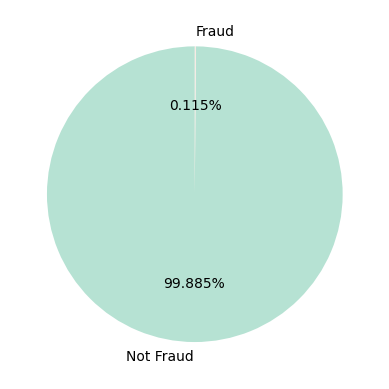

In [62]:
# Distribution of classes
print('\nCount:')
print(model_data['Is Fraud?'].value_counts())

print('\nDistribution:')
print(model_data['Is Fraud?'].value_counts() / model_data.shape[0])

# Visualize distribution with a pie chart
labels = ['Not Fraud', 'Fraud']
colors = ['#B6E2D3', '#FAE8E0']

plt.pie(model_data['Is Fraud?'].value_counts(), labels = labels, colors = colors, autopct='%.3f%%',startangle=90)
plt.show()

**Observation**
- Sample data class imbalance has 799,078 No and 922 Yes
- Majority of the transactions was not fraud. Only 0.125% of the transactions were fraud, therefore, we have an highly imbalanced class.


#### Divide independent variables into categorical and numerical features

In [63]:
# Identify categorical and numerical features
categorical_features = []
numerical_features = []
for i in model_data.columns:
    if model_data[i].dtype == 'object':
        categorical_features.append(i)  # Append to the list of categorical features
    else:
        numerical_features.append(i)    # Append to the list of numerical features

print(f"Categorical Features : {categorical_features}")
print(f"Numerical Features: {numerical_features}")

Categorical Features : ['Use Chip', 'Merchant City', 'Is Fraud?']
Numerical Features: ['Card', 'Month', 'Day', 'Amount', 'Merchant Name', 'MCC', 'Hour']


Boxplot: Visualize the distribution and identify outliers for each variable

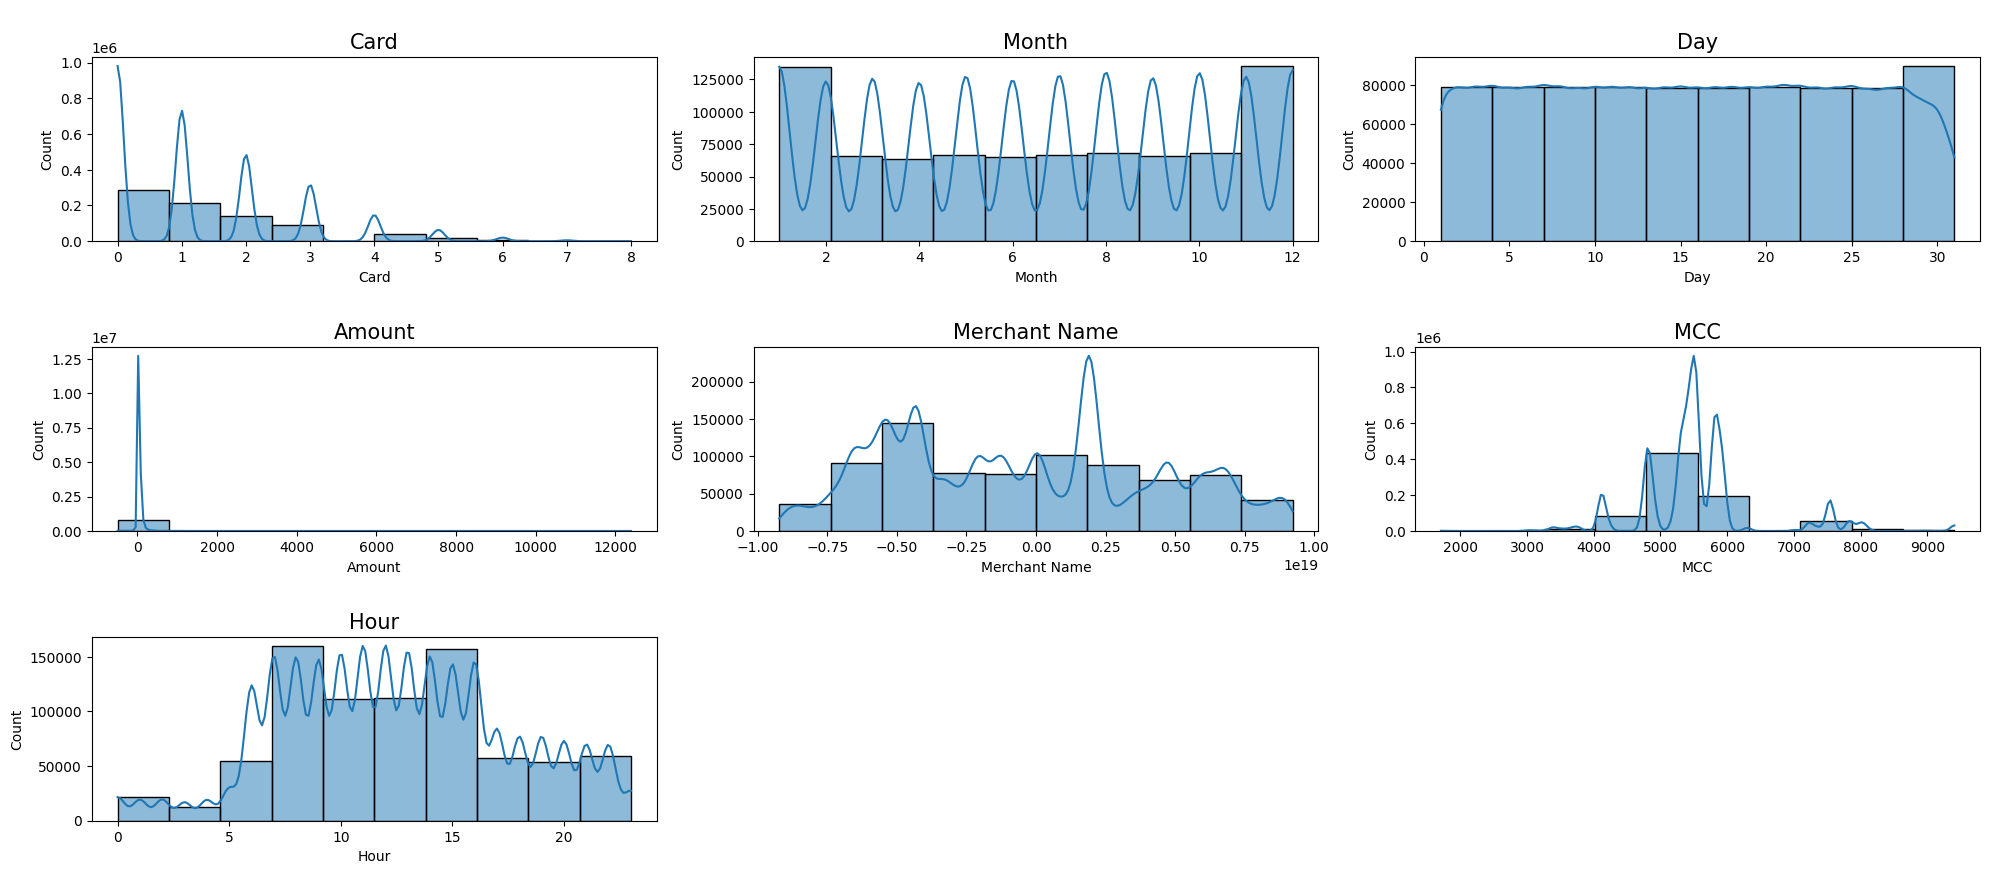

In [64]:
# Plot the histogram of numerical features
plt.figure(figsize = (20, 20))
plot_number = 1

bins_num= 10
for eachCol in numerical_features:
    if eachCol != "Is Fraud?":
        x = model_data[eachCol]
        y = model_data
        ax = plt.subplot(7, 3, plot_number)
        sns.histplot(x = x, data = y, ax = ax, bins = bins_num, kde=True)
        plt.title(f"\n{eachCol}", fontsize = 15)
        plot_number += 1

plt.tight_layout()
plt.show()

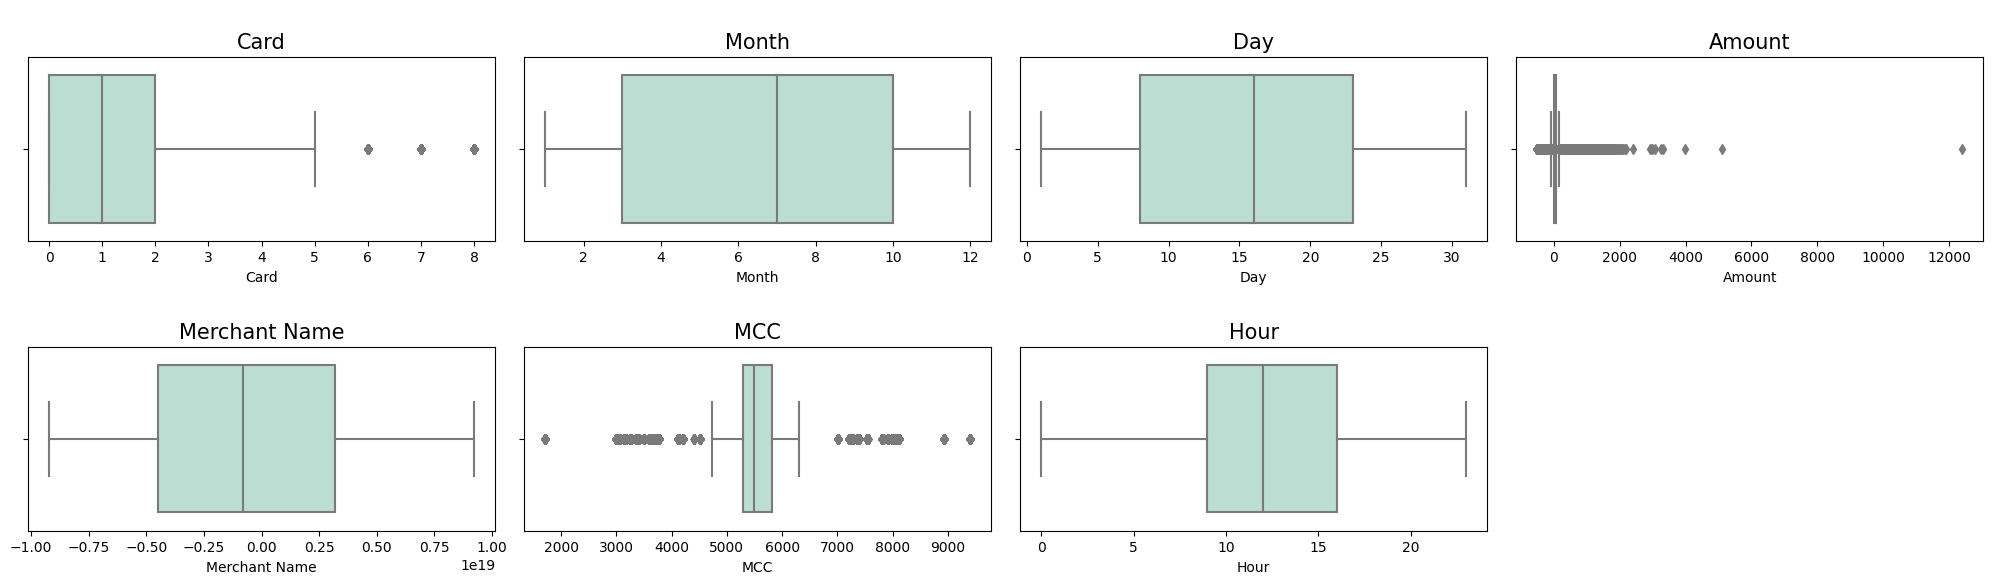

In [65]:
# Display the boxplot of numerical features
plt.figure(figsize = (20, 20))
plotnumber = 1

for feature in numerical_features:
    if feature != 'Is Fraud?':
        x = model_data[feature]
        ax = plt.subplot(7, 4, plotnumber)
        sns.boxplot(x = x, color=colors[0])
        plt.title(f"\n{model_data[feature].name}", fontsize = 15)
        plotnumber += 1
plt.tight_layout()
plt.show()

Stacked Bar Chart: Compare categories

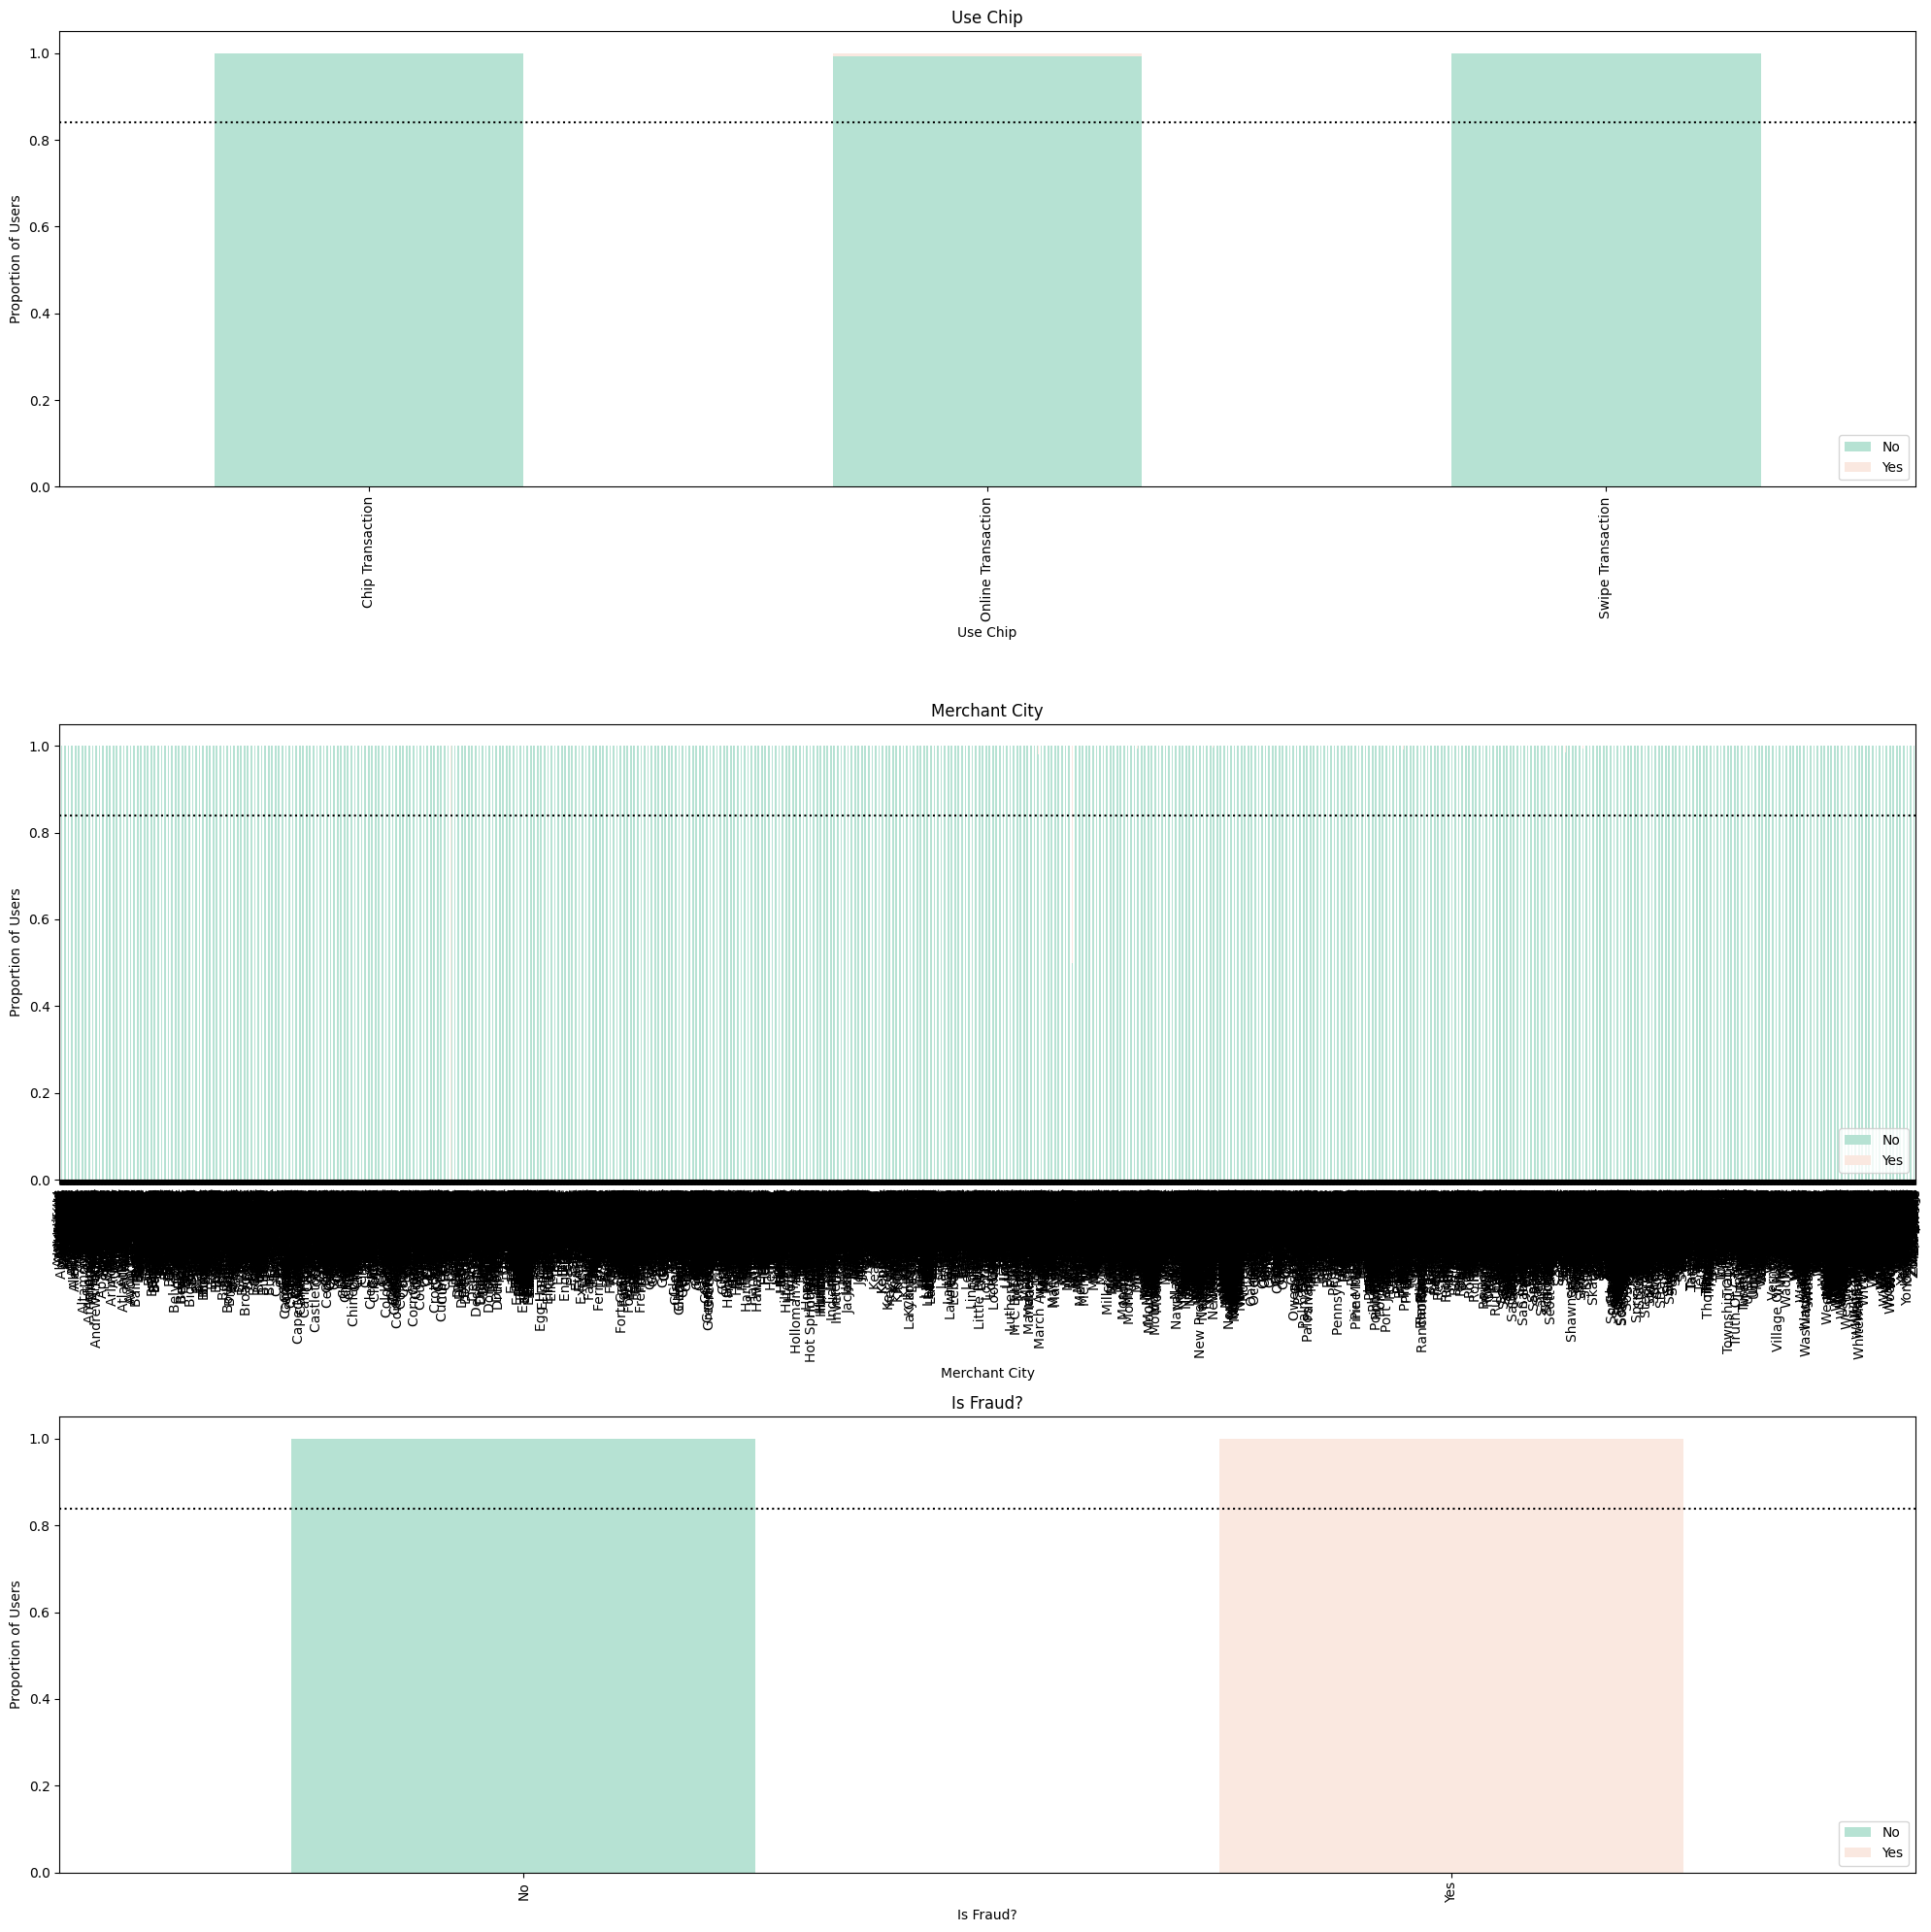

In [66]:
# Display stacked bar chart of categorical features
plt.figure(figsize = (20, 20))
plotnumber = 1
for feature in categorical_features:
    x = model_data[feature]
    ax = plt.subplot(3,1,plotnumber)   
    table=pd.crosstab(model_data[feature],model_data['Is Fraud?'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax, stacked=True, color = colors).legend(loc='lower right')
    plt.title(f'{feature}')
    plt.ylabel('Proportion of Users')
    plt.axhline(0.83934, color='black', ls='dotted')  # Baseline: Overall fraud rate
    plotnumber += 1

plt.tight_layout()
plt.show()

### Transform categorical to numerical

Target Variable <b>Is Fraud?</b> to numerical value

In [67]:
# Transform Is Fraud? to 1/0 value (Fraud: 1, Not Fraud: 0)
model_data["Is Fraud?"] = model_data["Is Fraud?"].replace({'No': 0, 'Yes': 1})
model_data.head(2)

,Card,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,MCC,Is Fraud?,Hour
4866429,1,3,15,50.43,Swipe Transaction,-3220758452254689706,Spokane,5311,0,7
5124282,1,9,20,53.78,Online Transaction,-2088492411650162548,ONLINE,4784,0,5


In [68]:
getDataSummary(model_data)

,data_type,count_unique_values,count_null
Card,int64,9,0
Month,int64,12,0
Day,int64,31,0
Amount,float64,32072,0
Use Chip,object,3,0
Merchant Name,int64,30165,0
Merchant City,object,9021,0
MCC,int64,109,0
Is Fraud?,int64,2,0
Hour,int32,24,0


One Hot Encoding for Use Chip

In [69]:
model_data = pd.get_dummies(model_data, columns=['Use Chip'], drop_first=True)

print(model_data.info())
model_data.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 4866429 to 10986571
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Card                         800000 non-null  int64  
 1   Month                        800000 non-null  int64  
 2   Day                          800000 non-null  int64  
 3   Amount                       800000 non-null  float64
 4   Merchant Name                800000 non-null  int64  
 5   Merchant City                800000 non-null  object 
 6   MCC                          800000 non-null  int64  
 7   Is Fraud?                    800000 non-null  int64  
 8   Hour                         800000 non-null  int32  
 9   Use Chip_Online Transaction  800000 non-null  uint8  
 10  Use Chip_Swipe Transaction   800000 non-null  uint8  
dtypes: float64(1), int32(1), int64(6), object(1), uint8(2)
memory usage: 59.5+ MB
None


,Card,Month,Day,Amount,Merchant Name,Merchant City,MCC,Is Fraud?,Hour,Use Chip_Online Transaction,Use Chip_Swipe Transaction
4866429,1,3,15,50.43,-3220758452254689706,Spokane,5311,0,7,0,1
5124282,1,9,20,53.78,-2088492411650162548,ONLINE,4784,0,5,1,0
17887935,3,2,10,30.98,-4113349227963201766,Lakeland,5411,0,11,0,0


BaseN Encoding for 'Merchant City' - Remove for now since this feature doesnt seem important
<!-- https://medium.com/analytics-vidhya/types-of-categorical-data-encoding-schemes-a5bbeb4ba02b -->

In [70]:
model_data.drop(columns=['Merchant City'], axis=1, inplace=True)

# import category_encoders as ce

# # create an object of the BaseNEncoder
# ce_baseN4 = ce.BaseNEncoder(cols=['Merchant City'],base=4)

# # fit and transform and you will get the encoded data
# model_data = ce_baseN4.fit_transform(model_data)

# print(model_data.info())
# model_data.head(10)


In [71]:
getDataSummary(model_data)

,data_type,count_unique_values,count_null
Card,int64,9,0
Month,int64,12,0
Day,int64,31,0
Amount,float64,32072,0
Merchant Name,int64,30165,0
MCC,int64,109,0
Is Fraud?,int64,2,0
Hour,int32,24,0
Use Chip_Online Transaction,uint8,2,0
Use Chip_Swipe Transaction,uint8,2,0


#### Correlation Heatmap

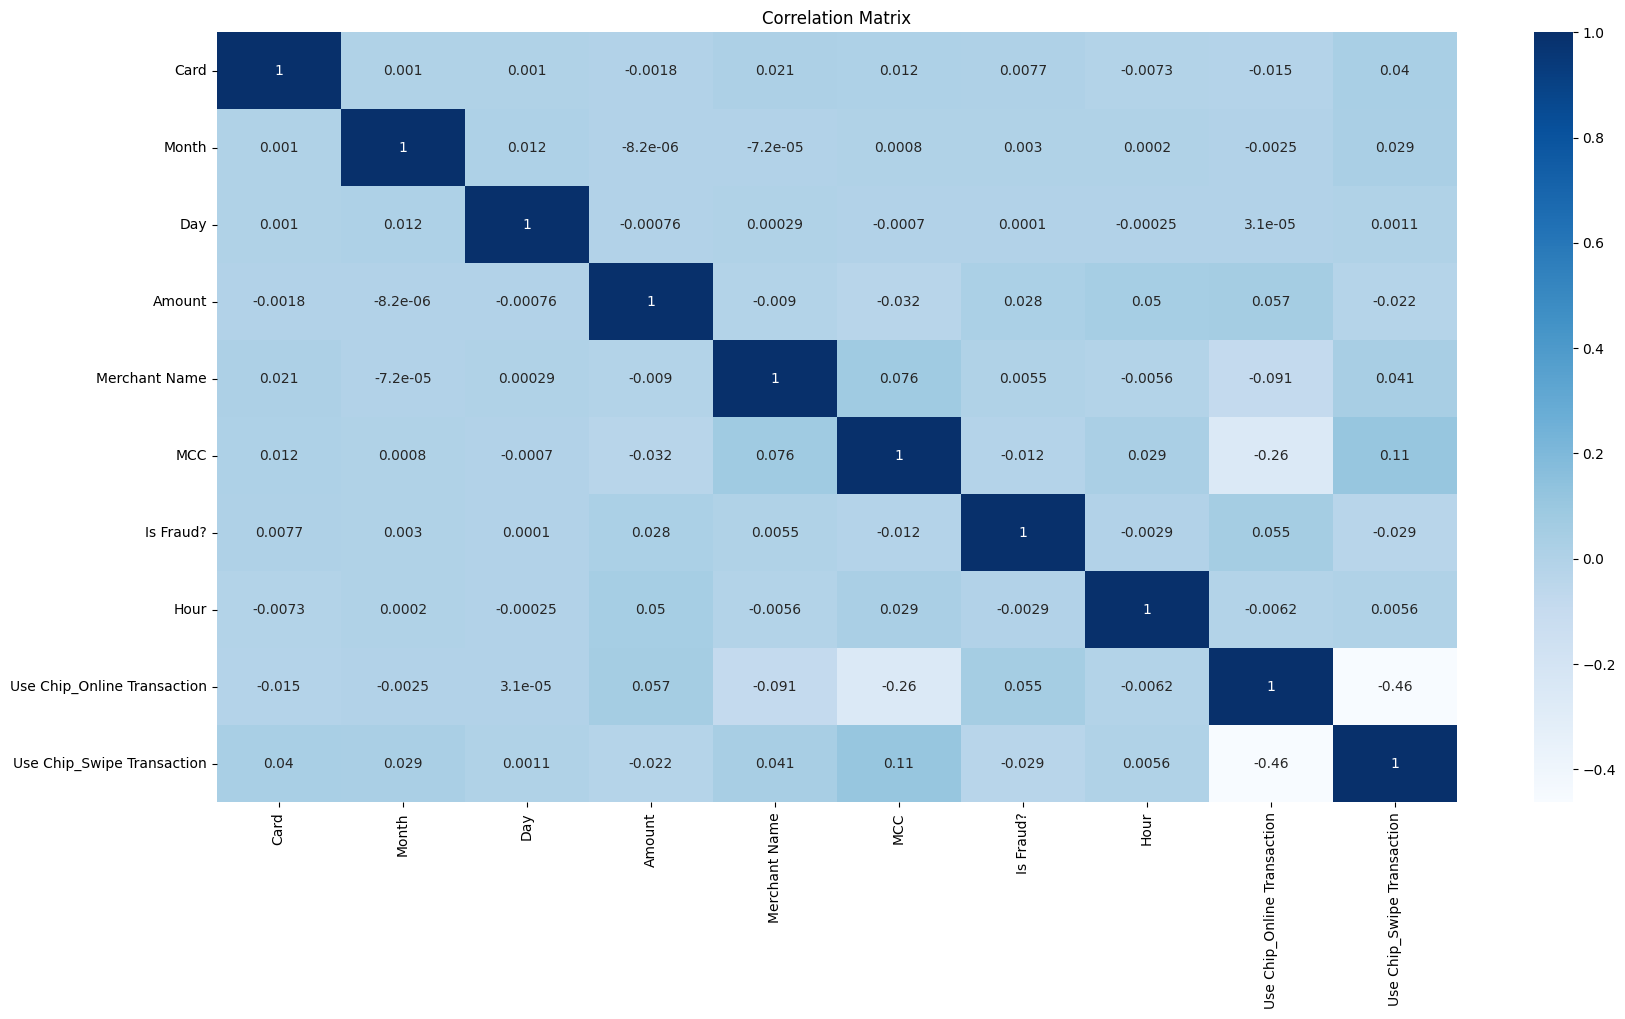

In [72]:
# Correlation Heat Map: Pair-wise correlation
plt.figure(figsize=(20,10))
sns.heatmap(model_data.corr(), annot=True, cmap='Blues')  #coolwarm
plt.title('Correlation Matrix')
plt.show()

<b>Observation: </b>

Weak multicolinearity between all the variables

<br>Reference: https://towardsdatascience.com/eveything-you-need-to-know-about-interpreting-correlations-2c485841c0b8

----------
## <center> Divide to Dependent and Independent Variables
----------

In [73]:
# Assign the Y and X features
y_values = model_data.loc[:, model_data.columns == 'Is Fraud?']
X_values = model_data.loc[:, model_data.columns != 'Is Fraud?']

print('Dependent Variable:')
print(y_values.columns)

print('\nIndependent Variables:',len(X_values.columns))
print(X_values.columns)

Dependent Variable:
Index(['Is Fraud?'], dtype='object')

Independent Variables: 9
Index(['Card', 'Month', 'Day', 'Amount', 'Merchant Name', 'MCC', 'Hour',
       'Use Chip_Online Transaction', 'Use Chip_Swipe Transaction'],
      dtype='object')


----------
## <center> Split Data to TRAIN and TEST
----------

In [74]:
# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_values,y_values,test_size=0.2,random_state=1234)

print('X Train:',X_train.shape)
print('Y Train:',y_train.shape)
print('X Test:',X_test.shape)
print('Y Test:',y_test.shape)
X_train.head()

X Train: (640000, 9)
Y Train: (640000, 1)
X Test: (160000, 9)
Y Test: (160000, 1)


,Card,Month,Day,Amount,Merchant Name,MCC,Hour,Use Chip_Online Transaction,Use Chip_Swipe Transaction
13834213,2,9,28,35.69,-2088492411650162548,4784,11,1,0
13486254,6,2,7,22.32,7104072324879282828,4121,12,0,1
11232954,2,7,16,7.27,-2472481739355111587,7538,12,0,1
13794879,0,4,1,49.55,-1688244360627004732,4784,21,1,0
23571117,4,2,8,0.00,-4282466774399734331,4829,17,0,1


----------
## <center> Feature Engineering
----------

### Scaling

### Oversampling Imbalance Class

In [75]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=1234)


# Perform oversampling using SMOTE
x_oversample_dtree,y_oversample_dtree = oversample.fit_resample(X_train, y_train)

# Class distribution after performing SMOTE
print('\nAfter Oversampling:')
print('No. of Observations:',len(y_oversample_dtree))
print(y_oversample_dtree['Is Fraud?'].value_counts() / len(y_oversample_dtree))


After Oversampling:
No. of Observations: 1278498
0    0.5
1    0.5
Name: Is Fraud?, dtype: float64


----------
## <center> Feature Selection
----------

### K-Fold Cross Validation
- Use K-Fold Cross Validation on the training set to identify the optimal depth of the tree. The minimum leaf size is set to 500.
- The decision tree is evaluated on imbalanced dataset with SMOTE oversampling
- This step uses RepeatedStratifiedKFold which repeats the cross-validation procedure n times for a more accurate estimate of model performance

In [76]:
# # Fitting trees on the training data using cross-validation
# def CrossValidation_DecisionTree(X, y, tree_depths, scoring):
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1234)
#     scores_list = []
#     scores_std = []
#     scores_mean = []
#     accuracy_scores = []
#     for depth in tree_depths:
#         tree_model = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=100, max_depth=depth)
#         steps = [('over', SMOTE()), ('model', tree_model)]
#         pipeline = Pipeline(steps=steps)
#         cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring)       
#         scores_list.append(cv_scores)
#         scores_mean.append(cv_scores.mean())
#         scores_std.append(cv_scores.std())
#         accuracy_scores.append(tree_model.fit(X, y).score(X, y))
#     scores_mean = np.array(scores_mean)
#     scores_std = np.array(scores_std)
#     accuracy_scores = np.array(accuracy_scores)
#     return scores_mean, scores_std, accuracy_scores
  
# # Plotting cross-validation results
# def CrossValidationPlot_DecisionTree(depths, scores_mean, scores_std, accuracy_scores, title):
#     fig, ax = plt.subplots(1,1, figsize=(15,5))
#     ax.plot(depths, scores_mean, '-o', label='average cross-validation accuracy (test accuracy)', alpha=0.9)
#     ax.fill_between(depths, scores_mean-2*scores_std, scores_mean+2*scores_std, alpha=0.2)
#     ax.plot(depths, accuracy_scores, '-*', label='training accuracy', alpha=0.9)
#     ax.set_title(title + ' per Tree Depth', fontsize=16)
#     ax.set_xlabel('Tree Depth', fontsize=13)
#     ax.set_ylabel(title, fontsize=13)
#     ax.set_ylim(0,1)
#     ax.set_xticks(depths)
#     ax.legend()

# # Depths to be run
# tree_depths = range(1,20)

# # Cross-validation Results: mean, stdev, accuracy
# scores_mean_accuracy, scores_std_accuracy, accuracy_scores = CrossValidation_DecisionTree(X_train, y_train, tree_depths, scoring='accuracy')
# scores_mean_recall, scores_std_recall, recall_scores = CrossValidation_DecisionTree(X_train, y_train, tree_depths, scoring='recall')
    
# # Plot results
# CrossValidationPlot_DecisionTree(tree_depths, scores_mean_accuracy, scores_std_accuracy, accuracy_scores, 'Accuracy Score')
# CrossValidationPlot_DecisionTree(tree_depths, scores_mean_recall, scores_std_recall, recall_scores, 'Recall Score')

**Observation:**
- Both the accuracy and recall scores doesnt seem to stabilize?

----------
## Model Training
----------

In [77]:
# Fit decision tree model
model_dtree = DecisionTreeClassifier(random_state = 1234, min_samples_leaf=1, max_depth=10)
model_dtree.fit(x_oversample_dtree, y_oversample_dtree)

# Predict the values of y in both the training and test datasets
# predict() is used to predict the class labels (1/0)
y_pred_train_dtree = model_dtree.predict(x_oversample_dtree)
y_pred_test_dtree = model_dtree.predict(X_test)

# predict_proba() is used to output probability estimates
y_pred_train_prob_dtree = model_dtree.predict_proba(x_oversample_dtree)
y_pred_test_prob_dtree = model_dtree.predict_proba(X_test)

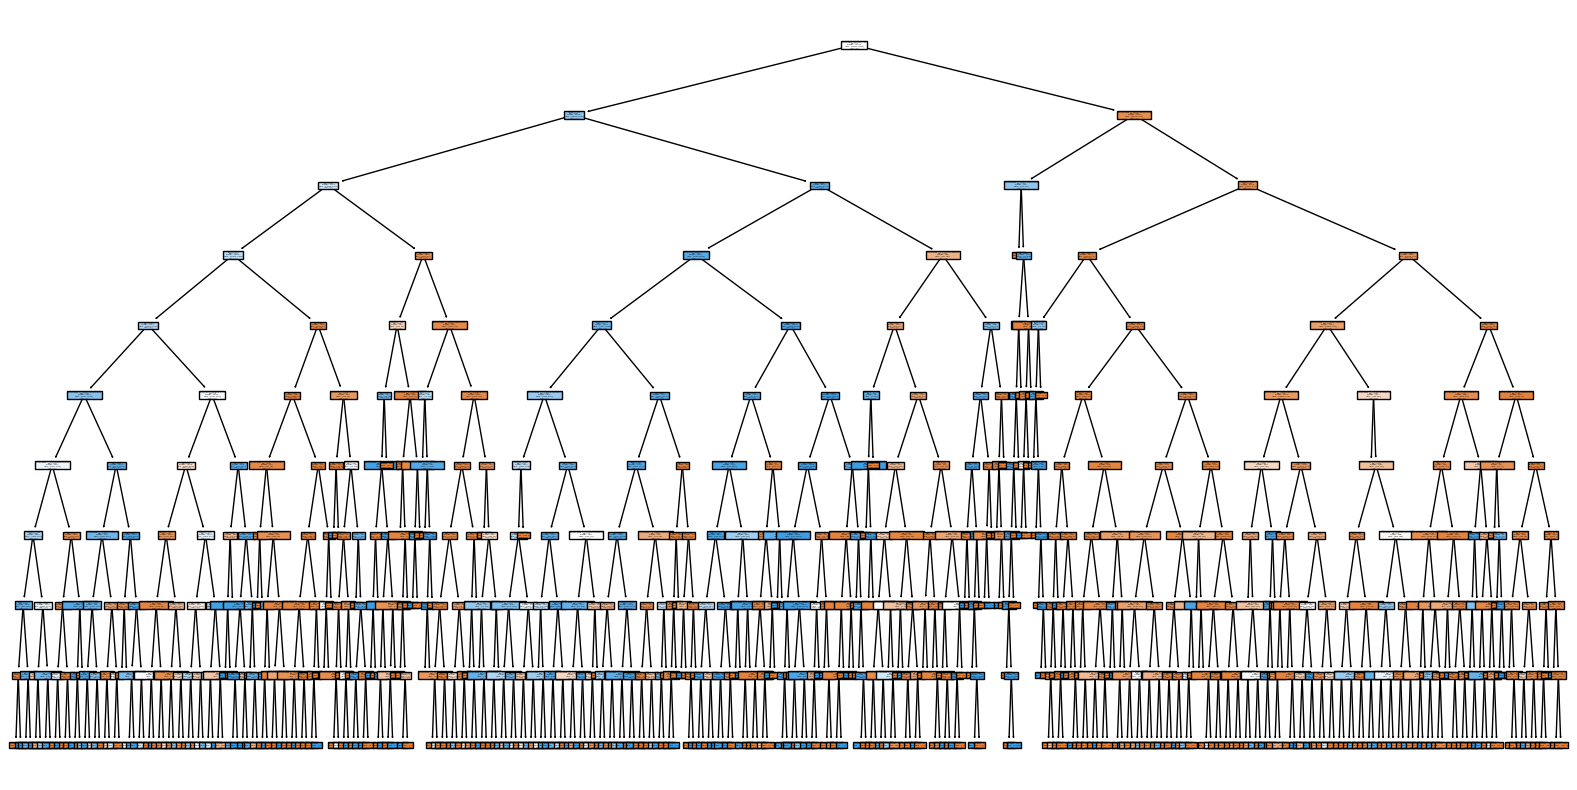

In [78]:
# Plot decision tree
fig = plt.figure(figsize = (20, 10))
tree.plot_tree(model_dtree, feature_names = list(x_oversample_dtree.columns), class_names = True, filled = True)
plt.show()

In [79]:
# Summary of Decision Tree Features 
dtree_summary = pd.DataFrame()
dtree_summary['Feature'] = x_oversample_dtree.columns
dtree_summary['Feature Importance'] = model_dtree.feature_importances_
dtree_summary = dtree_summary[dtree_summary['Feature Importance']>0]
dtree_summary

,Feature,Feature Importance
0,Card,0.000339
1,Month,0.027291
2,Day,0.008577
3,Amount,0.109348
4,Merchant Name,0.125441
5,MCC,0.120362
6,Hour,0.092264
7,Use Chip_Online Transaction,0.031535
8,Use Chip_Swipe Transaction,0.484842


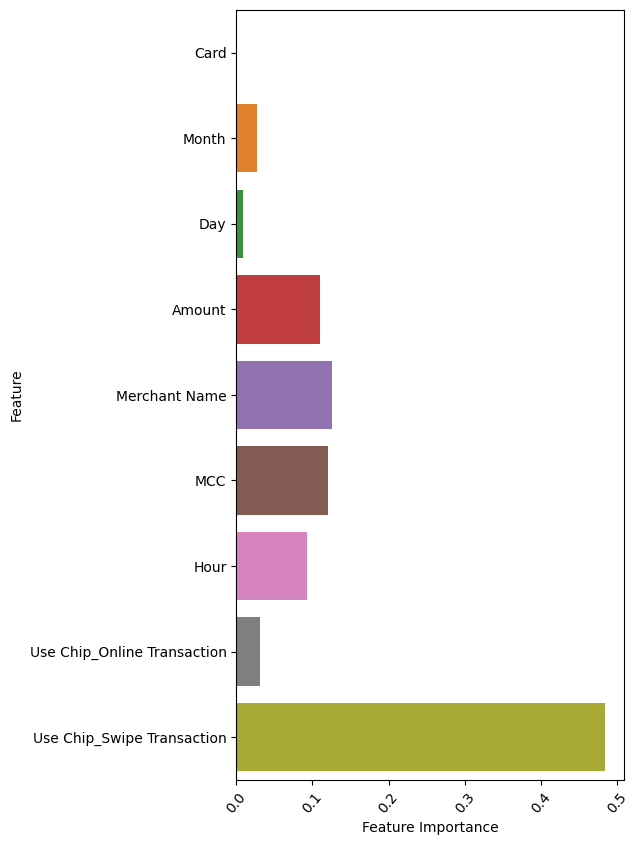

In [80]:
# Plot feature importance
fig = plt.figure(figsize = (5, 10))
# sns.barplot(x=model_dtree.feature_importances_, y=x_oversample_dtree.columns)
sns.barplot(x=dtree_summary['Feature Importance'], y=dtree_summary['Feature'])
plt.xticks(rotation = 50)
plt.show()

----------
## <center> Model Evaluation
----------

In [81]:
# Create a summary of model scores
model_score_list = ['classification accuracy', 
                    'precision', 
                    'recall', 
                    'f1 score',  
                    'ROC AUC',]

model_score = pd.DataFrame(pd.Series(model_score_list))
model_score.set_index(0, inplace=True)
# model_score

In [82]:
isTrainData = True

for sample_data in list([[y_oversample_dtree, y_pred_train_dtree], [y_test, y_pred_test_dtree]]):
    y_dtree = sample_data[0]
    y_pred = sample_data[1]

    rowIndex = model_score.index[0]
    model_score.loc[rowIndex, '1 - Yes'] = np.nan
    model_score.loc[rowIndex, '0 - No'] = np.nan
    model_score.loc[rowIndex, 'weighted ave'] =accuracy_score(y_dtree, y_pred).round(2)
    model_score

    rowIndex = model_score.index[1] 
    model_score.loc[rowIndex, '1 - Yes'] = precision_score(y_dtree,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = precision_score(y_dtree,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = precision_score(y_dtree,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[2]
    model_score.loc[rowIndex, '1 - Yes'] = recall_score(y_dtree,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = recall_score(y_dtree,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = recall_score(y_dtree,y_pred, average='weighted').round(2)

    rowIndex = model_score.index[3]
    model_score.loc[rowIndex, '1 - Yes'] = f1_score(y_dtree,y_pred, pos_label=1).round(2)
    model_score.loc[rowIndex, '0 - No'] = f1_score(y_dtree,y_pred, pos_label=0).round(2)
    model_score.loc[rowIndex, 'weighted ave'] = f1_score(y_dtree,y_pred, average='weighted').round(2)

    if isTrainData:
        model_score.index.name = 'TRAIN Model Score'
    else:
        model_score.index.name = 'TEST Model Score'

    display(model_score)
    isTrainData =  False

,1 - Yes,0 - No,weighted ave
TRAIN Model Score,,,
classification accuracy,NaN,NaN,0.91
precision,0.90,0.92,0.91
recall,0.92,0.89,0.91
f1 score,0.91,0.91,0.91
ROC AUC,NaN,NaN,NaN


,1 - Yes,0 - No,weighted ave
TEST Model Score,,,
classification accuracy,NaN,NaN,0.89
precision,0.01,1.00,1.00
recall,0.60,0.89,0.89
f1 score,0.01,0.94,0.94
ROC AUC,NaN,NaN,NaN


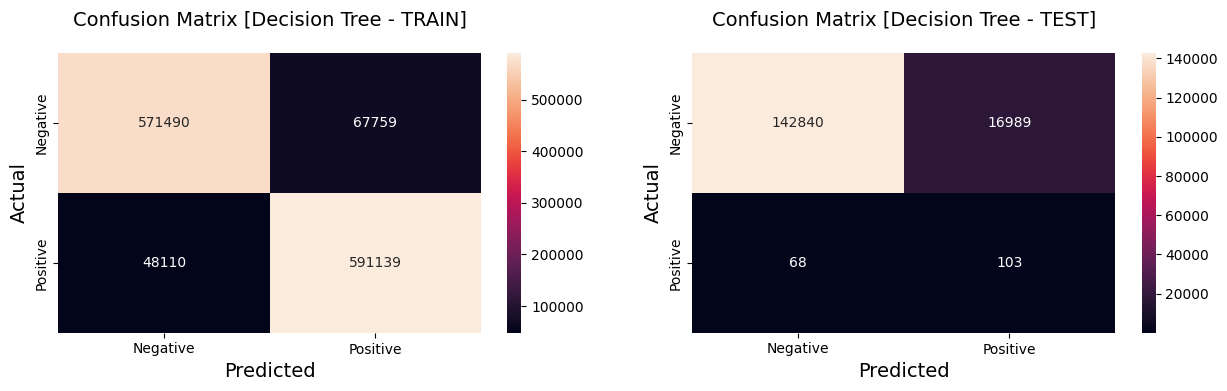

In [84]:
# Order of the input parameters is important: 
# 1st parameter - actual values
# 2nd parameter - predicted values
conf_matrix_train = confusion_matrix(y_oversample_dtree, y_pred_train_dtree)
conf_matrix_test = confusion_matrix(y_test, y_pred_test_dtree)


# Plot Confusion Matrix TRAIN

plt.figure(figsize=(15,8))

ax = plt.subplot(2, 2, 1)
ax = sns.heatmap(conf_matrix_train, annot=True, fmt='d')
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [Decision Tree - TRAIN]", fontsize=14, pad=20)


# Plot Confusion Matrix TEST
ax = plt.subplot(2, 2, 2)
ax = sns.heatmap(conf_matrix_test, annot=True, fmt='d')
# set x-axis label and ticks. 
ax.set_xlabel("Predicted", fontsize=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
# set plot title
ax.set_title(f"Confusion Matrix [Decision Tree - TEST]", fontsize=14, pad=20)
plt.show()